# Module 6. Labs regression analysis

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

## Exercise 1: Relation between heart weight and body weight in Cats

### Part 1

Perform a linear regression analysis on the variables body weight (`Bwt`, dependent variable) and heart weight (`Hwt`, independent variabele).


1. Import the dataset `Cats.csv`.


In [2]:
cats = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Cats.csv')
# Show the first few records of the Data Frame
cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


2. Draw a scatter plot of both variables.


C:\Users\liamr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


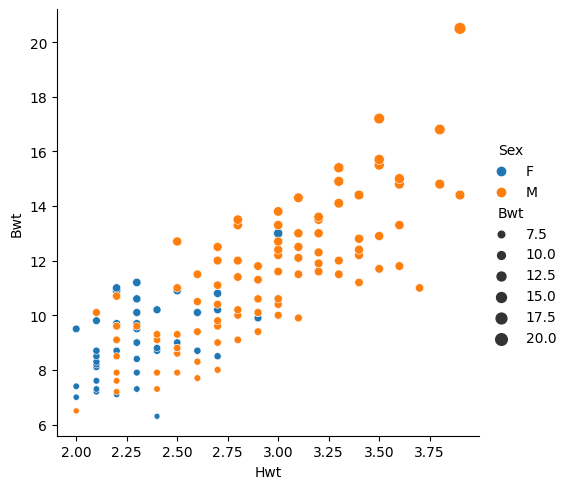

In [7]:
# X = independent (onafhankelijke) variable & Y = Dependent (afhankelijke) variable
sns.relplot(data=cats,
            x='Hwt', y='Bwt'
            ,size='Bwt',hue='Sex')

3. Calculate and draw the regression line.


<Axes: xlabel='Hwt', ylabel='Bwt'>

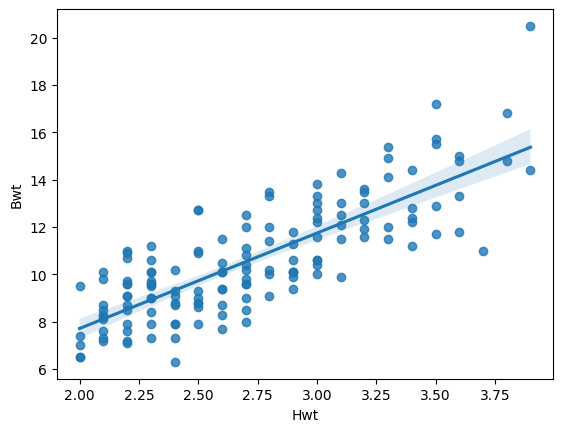

In [11]:
#We can draw our regplot to draw some conclusions before calculating it (Next code field)
#R dicht bij 0, stijgend verband en een sterk verband, bolletjes liggen dicht bij de lijn
sns.regplot(x=cats.Hwt, y=cats.Bwt)
#Alternatively sns.regplot(data=cats,x='Hwt', y='Bwt')




In [12]:
#Calculation of regression line SIMPLE METHOD
from sklearn.linear_model import LinearRegression

x = cats.Hwt.values.reshape(-1,1)
y = cats.Bwt

model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {model.intercept_:.2f} + {model.coef_[0]:.2f} x")


Regression line: ŷ = -0.35 + 4.03 x


4. Calculate the correlation coefficient and the coefficient of determination.

In [16]:
#Correlation coefficient
cor = np.corrcoef(cats.Hwt, cats.Bwt)[0][1]
print(f"R = {cor}")
#Coefficient of determination (Correlation coefficient squared)
print(f"R² = {cor **2}")

#R ~ 0.8 => Er is een stijgend verband, want R > 0 en er is een zeer sterk verband tussen de Hwt en Bwt van de katten (mits 0.8, zie tabel in demo_regression)
#Zeg niet, er is een sterk stijgend verband, maar zeg er is een stijgend verband en er is een sterk verband (onafhankelijke conclusies)

#R² ~ 0.64 => Er is een sterk verband tussen de Hwt en de Bwt (Zie dezelfde tabel in demo_regression), 
#+64% van de variantie van de afhankelijke veranderlijke (Bwt) wordt verklaard door de onafhankelijke veranderlijke zijnde de Hwt

R = 0.804134787315513
R² = 0.6466327561709654


5. Interpret the results from the previous steps.

### Part 2

1. Perform a linear regression analysis on the variables body weight (`Bwt`) and heart weight (`Hwt`), but this time **subdivided by gender** (`Sex`). Use the same dataset (`Cats.csv`).


In [19]:
cats = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Cats.csv')
# Show the first few records of the Data Frame
cats.head()
cats_male = cats[cats.Sex == 'M']
cats_female = cats[cats.Sex == 'F']

2. Draw a scatter plot of both variables for each gender.


C:\Users\liamr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\liamr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


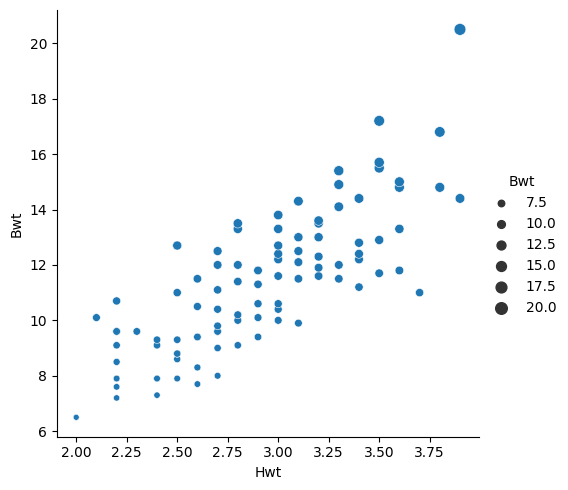

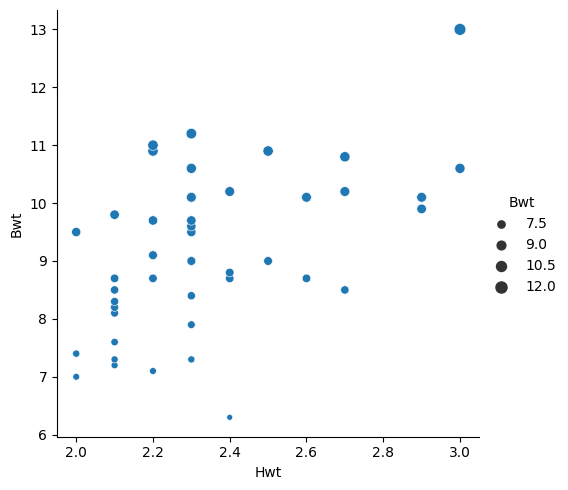

In [20]:
sns.relplot(data=cats_male,
            x='Hwt', y='Bwt'
            ,size='Bwt')
sns.relplot(data=cats_female,
            x='Hwt', y='Bwt'
            ,size='Bwt')

3. Calculate and draw the regression line.


In [23]:

#Calculation of regression line SIMPLE METHOD
from sklearn.linear_model import LinearRegression
#Males
x = cats_male.Hwt.values.reshape(-1,1)
y = cats_male.Bwt

model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {model.intercept_:.2f} + {model.coef_[0]:.2f} x")
#Females
x = cats_female.Hwt.values.reshape(-1,1)
y = cats_female.Bwt

model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {model.intercept_:.2f} + {model.coef_[0]:.2f} x")

Regression line: ŷ = -1.18 + 4.31 x
Regression line: ŷ = 2.98 + 2.64 x


<Axes: xlabel='Hwt', ylabel='Bwt'>

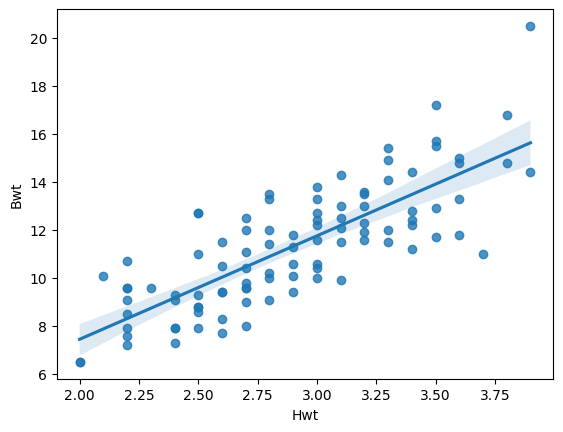

In [25]:
#Males
sns.regplot(x=cats_male.Hwt, y=cats_male.Bwt)


<Axes: xlabel='Hwt', ylabel='Bwt'>

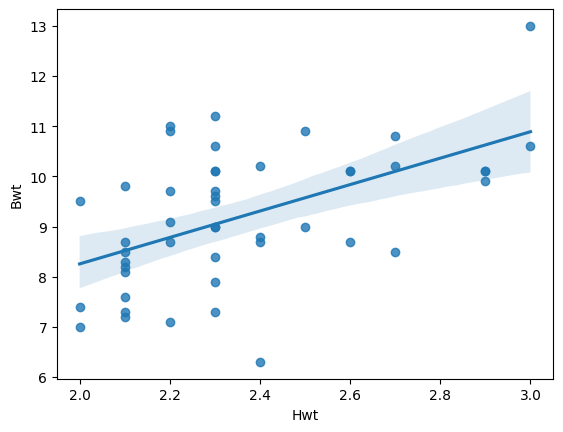

In [26]:
#Females
sns.regplot(x=cats_female.Hwt, y=cats_female.Bwt)

4. Calculate the correlation coefficient and the coefficient of determination.


In [ ]:
#Males
#Correlation coefficient
cor = np.corrcoef(cats_male.Hwt, cats_male.Bwt)[0][1]
print(f"R = {cor}")
#Coefficient of determination (Correlation coefficient squared)
print(f"R² = {cor **2}")
#Females
#Correlation coefficient
cor = np.corrcoef(cats_female.Hwt, cats_female.Bwt)[0][1]
print(f"R = {cor}")
#Coefficient of determination (Correlation coefficient squared)
print(f"R² = {cor **2}")

5. Interpret the results from the previous steps.

In [ ]:
#Same as example above, compare to table and look at the regplot

### Answers

| Selection |  $\beta_0$ | $\beta_1$ |       $R$ |     $R^2$ |
| :-------- | ---------: | --------: | --------: | --------: |
| All       | -0.3510784 | 4.0317575 | 0.8041348 | 0.6466328 |
| Male      | -1.1768253 | 4.3098189 | 0.7930443 | 0.6289193 |
| Female    |  2.9813124 |  2.636414 | 0.5320497 | 0.2830768 |


## Exercise 2: Flemish agricultural and horticultural businesses

1. Use the dataset agriculture flanders.csv. The file contains data about agricultural and horticultural businesses in Flanders

Source: Departement Landbouw en Visserij op basis van StatBel

In [76]:
farms = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/agriculture%20flanders.csv', delimiter = ";")
# Show the first few records of the Data Frame
farms.head()

,year,number_of_farms,average_area_per_farm_(ha)
0,1980,75706,"8,38"
1,1981,73292,"8,58"
2,1982,71255,"8,79"
3,1983,69807,"8,94"
4,1984,68083,"9,15"


2. What are the datatypes for each of the columns.

In [51]:
farms.info()
#Alternatively farms.dtypes

#Year int64
#number_of_farms int64
#average_area_per_farm(ha) object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        41 non-null     int64  
 1   number_of_farms             41 non-null     int64  
 2   average_area_per_farm_(ha)  41 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.1 KB


3. Change the datatype of 'average_area_per_farm_(ha)' to float.

In [77]:
#Due to the () we always have to use [], it won't interpret it well as such farms.average_area_per_farm_(ha)
#Replace comma by a dot first .str.replace(",",".")
farms['average_area_per_farm_(ha)'] = farms['average_area_per_farm_(ha)'].str.replace(",",".").astype(float)

4. Draw a scatter plot of the number of farms versus the year.


C:\Users\liamr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


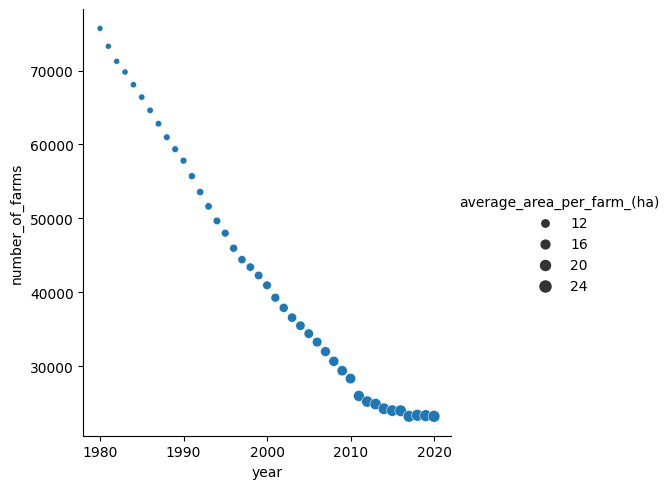

In [78]:
#Year onafhankelijke, number_of_farms afhankelijke
sns.relplot(data=farms,
            x='year', y='number_of_farms'
            ,size='average_area_per_farm_(ha)')
#Hier kunnen we eigenlijk al zien dat er een dalend verband is, mits de correlatie zo groot is dat het hier zichtbaar is

5. Is there a positive / negative relationship between year and number_of_farms?

R = -0.9861066349492859

In [79]:
#Correlation coefficient
cor = np.corrcoef(farms.year, farms.number_of_farms)[0][1]
print(f"R = {cor}")

#Er is een dalend verband want R < 0 en er is een exceptioneel sterk verband tussen het jaartal en het aantal boerderijen


R = -0.9861066349492859


6. Is there a strong relationship between year and 'number_of_farms'?

R² = 0.9724062954910041

In [80]:
#Coefficient of determination (Correlation coefficient squared)
print(f"R² = {cor **2}")

#Er is een exceptioneel sterk verband tussen het jaartal en het aantal boerderijen

R² = 0.9724062954910041


7. Draw a scatter plot of the 'average_area_per_farm_(ha)' versus the year.

C:\Users\liamr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


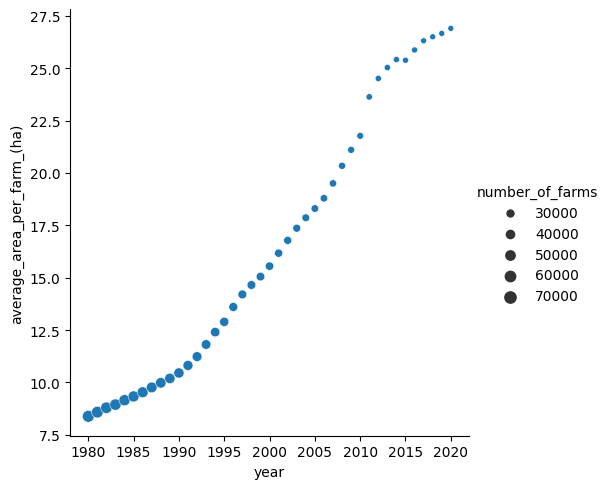

In [81]:
#Year onafhankelijke,average_area_per_farm_(ha)  afhankelijke
sns.relplot(data=farms,
            x='year', y='average_area_per_farm_(ha)'
            ,size='number_of_farms')

8. What will be the 'average_area_per_farm_(ha)' in 2035?

Average area in 2035 = 34.91987804878045

In [83]:
#Calculation of regression line SIMPLE METHOD
from sklearn.linear_model import LinearRegression
x = farms.year.values.reshape(-1,1)
y = farms['average_area_per_farm_(ha)']

model = LinearRegression().fit(x, y)
print(f"Regression line: ŷ = {model.intercept_:.2f} + {model.coef_[0]:.2f} x")

#Predict value of 2035 (two sets of square brackets are always needed (it expects an array as argument), it also returns an array that's why we need the third set to access the first element)
oppvervlakete_2035 = model.predict([[2035]])[0]
print(oppvervlakete_2035)

#Alternatively, calculate the value with the formula we printed x being 2035

Regression line: ŷ = -1031.90 + 0.52 x
34.91987804878045


8. Calculate the total agricultural area for each year.   
Calculate for each year the change of the total area relative to 1980.  
Make a plot.

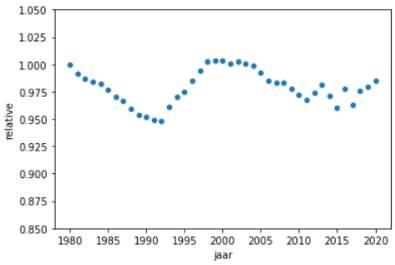


In [92]:
farms['total_area'] = farms['average_area_per_farm_(ha)'] * farms['number_of_farms']
area_1980 = farms[farms.year == 1980]['total_area'][0]
farms['area_relative_to_1980'] = farms['total_area'] / area_1980

C:\Users\liamr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


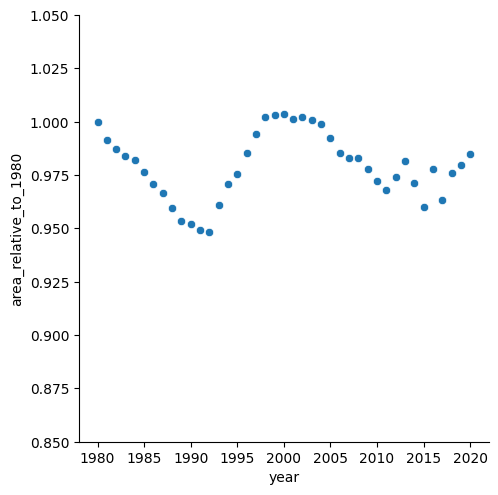

In [95]:
p = sns.relplot(data=farms,x='year', y='area_relative_to_1980')
#Changing the scale of the y axis, very small values
p.set(ylim = (0.85,1.05))

## Exercise 3: Movies of 2006 and 2007

1. The file Movies_2006_2007 contains information on over 200
movies that were released during 2006 and 2007.

In [ ]:
movies = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Movies_2006_2007.csv', delimiter = ";", encoding='cp1252')
# Show the first few records of the Data Frame
movies.head()

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,$22 707 121,$32 109 139,$39 517 763,$11 000 000,$15 909 367,$16 000 000
1,2.0,Year of the Dog,Paramount Vantage,Drama,$141 803,$318 598,$1 540 141,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,$12 839 402,NaN,$22 466 994,$18 200 000,$27 040 983,$25 000 000
3,4.0,Stomp the Yard,Sony Pictures,Drama,$28 263 594,$42 853 277,$61 356 221,$15 000 000,$33 166 898,$14 000 000
4,5.0,The Illusionist,Freestyle Releasing,Drama,NaN,NaN,$39 868 642,$44 407 533,$38 189 217,$16 500 000


2. Use cols_with_dollars to transform the amounts in dollars into floats.
For ease of use, change the values into 'million dollar' - values.  
E.g. $22 707 121	becomes 22.707121.  


In [ ]:
cols_with_dollars = ['7-day Gross',	'14-day Gross',	'Total US Gross',	'International Gross',	'US DVD Sales',	'Budget']

3. Create two scatterplots: one of Total US Gross (Y) versus
7-day Gross (X) and one of Total US Gross (Y)
versus 14-day Gross (X).

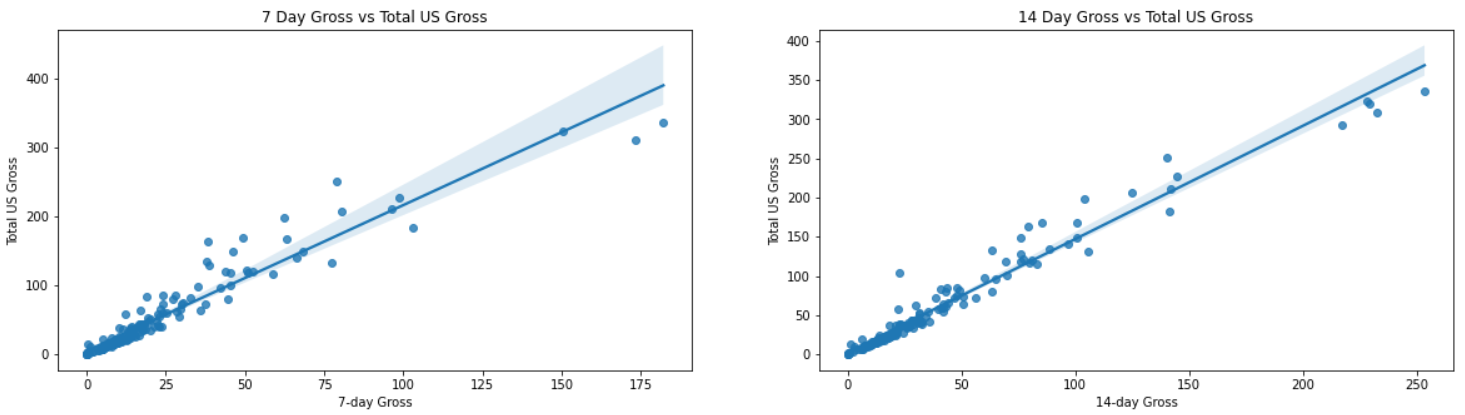

4. What are the corresponding
values for $R$ and $R^2$?

R (7 Day Gross vs Total US Gross) = 0.959407544414305  
R² (7 Day Gross vs Total US Gross) = 0.9204628362790865  
R (14 Day Gross vs Total US Gross) = 0.9813238689021966  
R² (14) Day Gross vs Total US Gross) = 0.9629965356771755

5. What are the equations of the linear regression lines in the previous part?  
What exactly does intercept and slope tell you about the movie business?

7 days gross: ŷ = 4.590921233818129 + 2.113464756610182 * x  
14 days gross: ŷ = 2.44900289255105 + 1.4464530702590803 * x

6. In the previous scatterplots you can see some ouliers at the right side. These are movies that did great
during their first week or two. 
* 6.1 Make a boxplot to visualize the outliers for the first week or two.

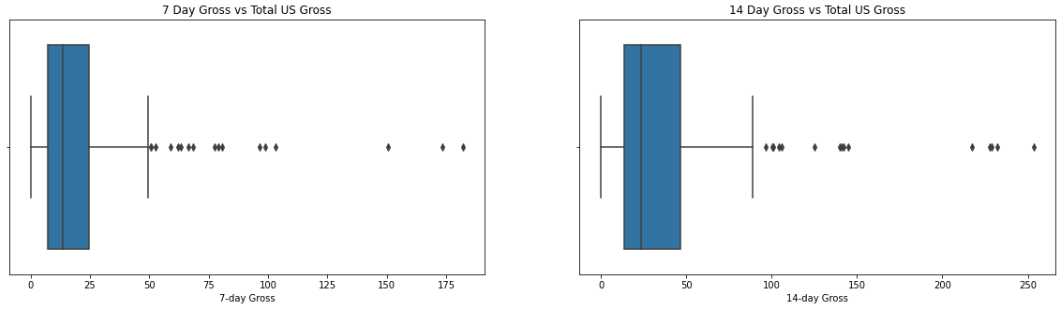

* 6.2 Calculate the upper limit values for the first week or two.

limit_7_days_gross is 50.376637875  
limit_14_days_gross is 96.2906745

* 6.3 What are the outliers for the first week or two?

A few movies for the first week: 

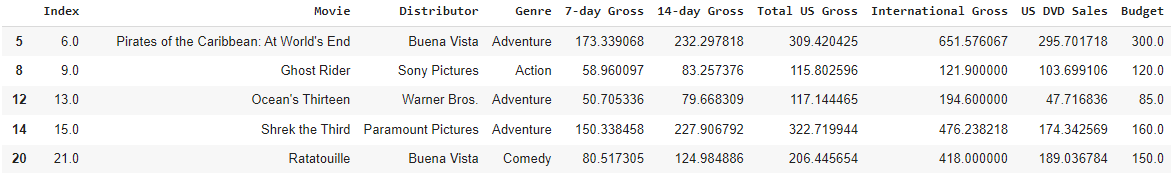

* 6.4 Remove the outliers out of the dataset.

* 6.5 Give the new values for $R$ and $R^2$.


R (7 Day Gross vs Total US Gross)= 0.9324792650689281  
R² (7 Day Gross vs Total US Gross) = 0.8695175797834882

R (14 Day Gross vs Total US Gross)= 0.9584258717658031  
R² (14) Day Gross vs Total US Gross) = 0.9185801516700396

* 6.6 Give the new values for the slope and the intercept of the regression lines. Do the outliers have a great effect?


7 days gross: ŷ = -5.073945979380596 + 2.7456809688135646 * x  
14 days gross: ŷ = -3.227354951096885 + 1.6529869503645318 * x

## Exercise 4
The file production.csv contains the production cost per unit produced. That is, producing the 100th unit costs 82 EUR and producing the 600th unit costs 34 EUR.  
(a) Make the following plot  

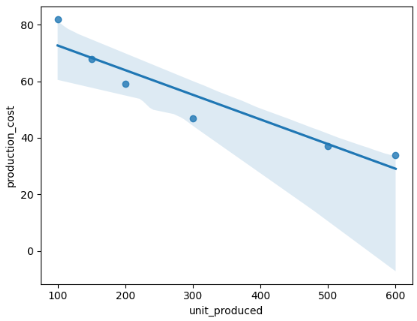

(b) Based on this plot  
(b.1) Can you decide whether the relationship between the number of units produced and the production cost is positive / negative.   
(b.2) Can you decide whether the relationship between number of units produced and production costis weak / strong.  
(b.3) Can you decide whether $R$ will be between [-1,-0.5] / [-0.5, 0] / [0, 0.5] / [0.5,1].  
(c) What is the production cost for the 400th unit?  
(d) How much loss will the company incur if not a single unit is produced?  
(e) How much does it cost in total to produce 1000 units  


Some answers  
(c) the 400th unit costs 46.5051  
(d) loss when no unit produced 81.392  
(e) total cost for 1000 units 37739.8969

<Axes: xlabel='unit_produced', ylabel='production_cost'>

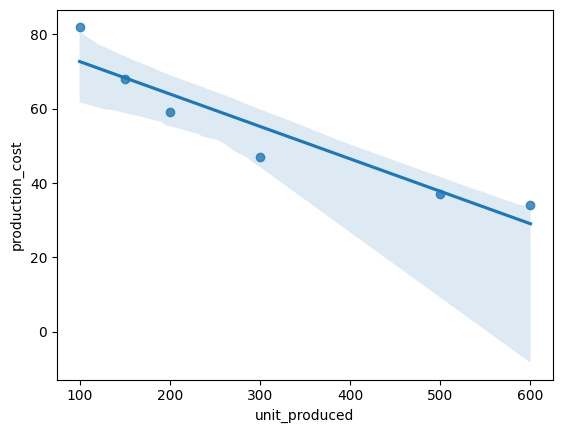

In [98]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/production.csv', delimiter=";")
df.head(20)
sns.regplot(data = df, x='unit_produced', y='production_cost')
#b.1 een negatief verband tussen ...
#b.2 Een sterk verband tussen ... want de punten liggen dicht tegen onze lijn
#b.3 de waarde van R zal liggen tussen -1 en -0.5
#c (predict 400) 46.50515463917525
#d  (predict 0) 81.3917525773196
#e 37739.896907216484

In [109]:
#Calculation of regression line SIMPLE METHOD
from sklearn.linear_model import LinearRegression
x = df.unit_produced.values.reshape(-1,1)
y = df.production_cost

model = LinearRegression().fit(x, y)
print(f"Regression line: ŷ = {model.intercept_:.2f} + {model.coef_[0]:.2f} x")
model.predict([[400]])[0]
model.predict([[0]])[0]
#Starts at 1, end of range non inclusive so 1001 instead of 1000
np.sum([model.predict([[x]])[0] for x in range(1,1001)])

Regression line: ŷ = 81.39 + -0.09 x


37739.896907216484